# Projet Data Science - Simulateur de DPE
## ENSAE Paris - 2A

Membres du groupe : 
- Wiam LACHQER , Amine RAZIG , Julien BOUDIER

Ce projet Python a été créé dans le but de fournir des visualisations variées des données et de mettre en place un simulateur de Diagnostic de Performance Energétique (DPE) à partir de la base de données de l'ADEME (Agence de la Transition Écologique).

## Objectifs du Projet

1. **Visualisations de Données :** Le projet propose différentes visualisations des données issues de la base de l'ADEME. Ces visualisations permettent une compréhension approfondie des caractéristiques énergétiques des logements.

2. **Simulateur de DPE :** Un simulateur de DPE a été développé en utilisant les données de l'ADEME. Ce simulateur permet d'estimer la performance énergétique d'un logement en fonction de divers paramètres.

In [1]:
#!pip install -q -r requirements.txt

In [2]:
# Importation des librairies qu’on va utiliser

import fetchdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
import fetchdata

chosen_variables=['Etiquette_GES',
                  'Etiquette_DPE',
                  'Année_construction',
                  'Type_bâtiment',
                  'Période_construction',
                  'Hauteur_sous-plafond',
                  'Surface_habitable_logement',
                  'Classe_altitude',
                  'Zone_climatique_',
                  #'Nom__commune_(BAN)',
                  #'Coordonnée_cartographique_X_(BAN)',     
                  #'Coordonnée_cartographique_Y_(BAN)',
                  #'N°_région_(BAN)',
                  'Conso_5_usages_é_finale',
                  'Conso_5_usages/m²_é_finale',
                  'Conso_chauffage_é_finale',
                  'Emission_GES_5_usages',
                  'Emission_GES_5_usages_par_m²',
                  'Conso_5_usages_é_finale_énergie_n°1',
                  'Coût_total_5_usages_énergie_n°1',
                  'Conso_5_usages_é_finale_énergie_n°2',
                  'Coût_total_5_usages_énergie_n°2',
                  'Conso_5_usages_é_finale_énergie_n°3',
                  'Coût_total_5_usages_énergie_n°3',
                  'Coût_total_5_usages',
                  'Qualité_isolation_enveloppe',
                  'Qualité_isolation_menuiseries',
                  'Qualité_isolation_murs',
                  'Qualité_isolation_plancher_bas',
                  'Type_énergie_principale_chauffage',
                  'Type_installation_ECS',
                  'Type_installation_solaire',
                  'Surface_climatisée',               
                  'Type_ventilation']
df_DPE = fetchdata.get_dpe(chosen_variables, size =100)


Fetched 10000 observations


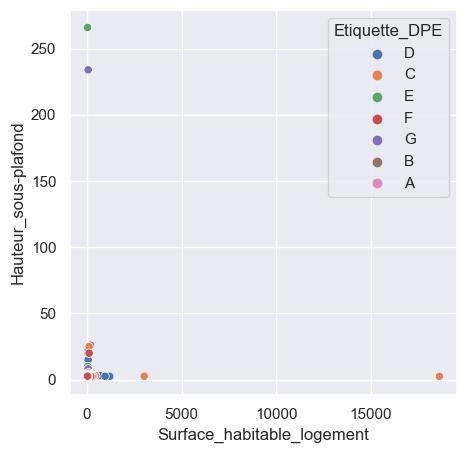

In [8]:
import eda

eda.scatterplot(df_DPE, "Surface_habitable_logement", "Hauteur_sous-plafond", "Etiquette_DPE")

Le simulateur de DPE en fonction d’informations accessibles pour le propriétaire et le locataire: 

In [9]:
eda.create_unique(df_DPE)

,Column_name,Data_type,Number_of_unique,Number_of_missing,Unique_values
0,Coût_total_5_usages_énergie_n°3,float64,1930,7674,More than 15 unique values
0,Coût_total_5_usages_énergie_n°2,float64,5227,1815,More than 15 unique values
0,Coût_total_5_usages_énergie_n°1,float64,6948,0,More than 15 unique values
0,Qualité_isolation_enveloppe,object,4,0,"[insuffisante, très bonne, bonne, moyenne]"
0,Type_installation_ECS,object,3,46,"[installation individuelle, nan, installation ..."
0,Coût_total_5_usages,float64,7084,0,More than 15 unique values
0,Emission_GES_5_usages,float64,8438,0,More than 15 unique values
0,Qualité_isolation_menuiseries,object,4,0,"[bonne, moyenne, très bonne, insuffisante]"
0,Qualité_isolation_murs,object,4,0,"[insuffisante, très bonne, moyenne, bonne]"
0,Etiquette_GES,object,7,0,"[C, D, B, F, E, A, G]"


## Mise en place de la base de données exploitable. 
L'objectif est de selectionner et de modifier certaines variables afin qu'elles puissent etre utilisées efficacement dans nos analyses.

In [ ]:
# Traitement des données manquantes

# Suppression des colonnes avec plus de 60% des valeurs manquantes
df.drop(["Type_énergie_n°3","Isolation_toiture_(0/1)", "_score"], axis=1, inplace=True)

# Suppression des lignes dans lesquelles la surface habitable est non renseignée
df=df[df["Surface_habitable_logement"].notna()]
df=df[df["Qualité_isolation_plancher_bas"].notna()]

# Pour les données qui ont Type_énergie_principale_ECS=Nan ou Type_énergie_principale_chauffage=Nan, on remplit ces cases par Type_énergie_n°1
df["Type_énergie_principale_ECS"].fillna(df["Type_énergie_n°1"], inplace = True)
df["Type_énergie_principale_chauffage"].fillna(df["Type_énergie_n°1"], inplace = True)

# Remplacez tous les types de bois dans la varaible 'Type_énergie_principale_chauffage' par 'bois'
df['Type_énergie_principale_chauffage'] = df['Type_énergie_principale_chauffage'].replace(['Bois – Bûches','Bois – Granulés (pellets) ou briquettes', 'Bois – Plaquettes d’industrie', 'Bois – Plaquettes forestières'], 'Bois')
# Remplacez tous les types de bois dans la varaible 'Type_énergie_principale_ECS' par 'bois'
df['Type_énergie_principale_ECS'] = df['Type_énergie_principale_ECS'].replace(['Bois – Bûches','Bois – Granulés (pellets) ou briquettes', 'Bois – Plaquettes d’industrie', 'Bois – Plaquettes forestières'], 'Bois')

# La simulation portera uniquement sur les maisons et les appartements, on supprime les immeubles
df=df[df["Type_bâtiment"]!="immeuble"]

# L’encodage des variables non numériques
label_encoder = LabelEncoder()
df['Qualité_isolation_plancher_bas_encoded'] = label_encoder.fit_transform(df['Qualité_isolation_plancher_bas'])
df["Qualité_isolation_murs_encoded"] = label_encoder.fit_transform(df['Qualité_isolation_murs'])
df["Période_construction_encoded"] = label_encoder.fit_transform(df['Période_construction'])
df["Type_énergie_principale_ECS_encoded"] = label_encoder.fit_transform(df['Type_énergie_principale_ECS'])
df["Type_énergie_principale_chauffage_encoded"] = label_encoder.fit_transform(df['Type_énergie_principale_chauffage'])
df["Période_construction_encoded"] = label_encoder.fit_transform(df['Période_construction'])
df = pd.get_dummies(df, columns=['Type_bâtiment'])

df



,Type_énergie_n°1,Type_énergie_n°2,Type_ventilation,Qualité_isolation_plancher_bas,Qualité_isolation_murs,Hauteur_sous-plafond,Surface_habitable_logement,Code_postal_(brut),Période_construction,Type_énergie_principale_ECS,Type_énergie_principale_chauffage,Etiquette_DPE,Qualité_isolation_plancher_bas_encoded,Qualité_isolation_murs_encoded,Période_construction_encoded,Type_énergie_principale_ECS_encoded,Type_énergie_principale_chauffage_encoded,Type_bâtiment_appartement,Type_bâtiment_maison
0,Gaz naturel,Bois – Bûches,Ventilation par ouverture des fenêtres,très bonne,insuffisante,2.9,220.8,25000,avant 1948,Gaz naturel,Gaz naturel,D,3,1,9,3,4,1,0
1,Gaz naturel,Électricité,NaN,très bonne,insuffisante,2.5,50.0,13120,1948-1974,Gaz naturel,Électricité,D,3,1,0,3,7,1,0
2,Gaz naturel,Bois – Bûches,VMC SF Hygro B après 2012,très bonne,très bonne,2.5,93.0,59710,2013-2021,Gaz naturel,Gaz naturel,C,3,3,7,3,4,0,1
3,Réseau de Chauffage urbain,Gaz naturel,NaN,insuffisante,insuffisante,2.5,47.5,44800,1975-1977,Réseau de Chauffage urbain,Réseau de Chauffage urbain,C,1,1,1,5,6,1,0
4,Électricité,Réseau de Chauffage urbain,NaN,très bonne,insuffisante,2.5,109.0,92340,1983-1988,Réseau de Chauffage urbain,Électricité,E,3,1,3,5,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gaz naturel,Électricité,VMC SF Auto réglable avant 1982,très bonne,insuffisante,2.5,87.0,16270,1978-1982,Gaz naturel,Gaz naturel,D,3,1,2,3,4,1,0
9996,Gaz naturel,Gaz naturel,NaN,insuffisante,insuffisante,2.5,84.2,62400,1948-1974,Gaz naturel,Gaz naturel,E,1,1,0,3,4,0,1
9997,Gaz naturel,Électricité,VMC SF Hygro A avant 2001,bonne,moyenne,2.5,44.0,94200,1983-1988,Gaz naturel,Gaz naturel,D,0,2,3,3,4,1,0
9998,Gaz naturel,Électricité,VMC SF Auto réglable avant 1982,moyenne,insuffisante,2.5,63.0,62980,avant 1948,Gaz naturel,Gaz naturel,E,2,1,9,3,4,0,1


In [ ]:
df['Qualité_isolation_plancher_bas'].unique()

array(['très bonne', 'insuffisante', 'moyenne', 'bonne'], dtype=object)

## Analyse descriptive de la base de donnée : 
- répartition des types d'énergies principaux des logements ?
- type de chauffage utilisé en majorité selon la note de l'étiquette DPE ? 
- etiquette DPE en fonction des codes postaux (représentation cartographique ? ) rq => ajouter dans la base de donnéee les données géo
- etiquette DPE en fonction de l'année de construction ?
- surface habitable 

rq :  quels sont les variables cibles dans la base ? on cherche a prédri les consos, les émissions etc... Objectifs avec ces variables est de faire un indicateur de performanace énergétiques et ensuite de le prédire. 

Méthodologie => se baser sur la litterature pour comprendre les indicateurs majeur de performance énergetique, création de l'indice en attribuant des poids aux varaibles cibles, les normaliser ? moyenne ? 




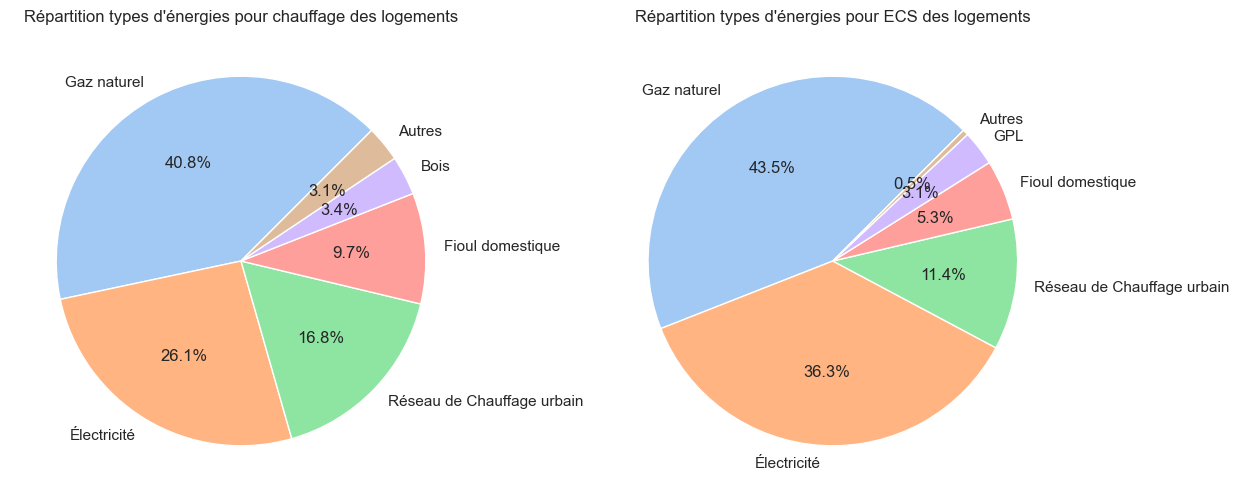

In [ ]:
# Analyse descriptive de la base de donnée : 
bd_dpe = df.copy()

# répartition des types d'energies de chauffage  des logements : 
comptage_type_chauffage = bd_dpe['Type_énergie_principale_chauffage'].value_counts()
comptage_type_ECS = bd_dpe['Type_énergie_principale_ECS'].value_counts()


### REPRESENTATION GRAPHIQUE 
# Calcul des pourcentages pour chaque type d'énergie
pourcentages_chauffage = (comptage_type_chauffage / len(bd_dpe)) * 100
pourcentages_ECS = (comptage_type_ECS / len(bd_dpe)) * 100

# Seuil pour regrouper les petites catégories sous "Autres"
seuil = 3

# Regroupement des petites catégories sous "Autres" si leur pourcentage est inférieur au seuil
autres_chauffage = pourcentages_chauffage[pourcentages_chauffage < seuil].sum()
autres_ECS = pourcentages_ECS[pourcentages_ECS < seuil].sum()

# Création de nouveaux tableaux pour le graphique avec "Autres"
nouveaux_pourcentages_chauffage = pourcentages_chauffage[pourcentages_chauffage >= seuil]
nouveaux_pourcentages_chauffage['Autres'] = autres_chauffage

nouveaux_pourcentages_ECS = pourcentages_ECS[pourcentages_ECS >= seuil]
nouveaux_pourcentages_ECS['Autres'] = autres_ECS

# Création des graphiques
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Graphique pour le chauffage
axes[0].pie(x=nouveaux_pourcentages_chauffage, labels=nouveaux_pourcentages_chauffage.index, startangle=45,
            colors=sns.color_palette('pastel', len(nouveaux_pourcentages_chauffage)), autopct='%1.1f%%')
axes[0].set_title('Répartition types d\'énergies pour chauffage des logements')

# Graphique pour l'ECS
axes[1].pie(x=nouveaux_pourcentages_ECS, labels=nouveaux_pourcentages_ECS.index, startangle=45,
            colors=sns.color_palette('pastel', len(nouveaux_pourcentages_ECS)), autopct='%1.1f%%')
axes[1].set_title('Répartition types d\'énergies pour ECS des logements')

# Affichage des graphiques
plt.show()


In [ ]:
# Corrélation

corr = bd_dpe.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\pc\AppData\Local\Temp\ipykernel_17248\2944900763.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bd_dpe.corr()


,Hauteur_sous-plafond,Surface_habitable_logement,Qualité_isolation_plancher_bas_encoded,Qualité_isolation_murs_encoded,Période_construction_encoded,Type_énergie_principale_ECS_encoded,Type_énergie_principale_chauffage_encoded,Type_bâtiment_appartement,Type_bâtiment_maison
Hauteur_sous-plafond,1.000000,-0.001303,0.013884,-0.005678,0.030541,0.015546,0.013652,-0.002651,0.002651
Surface_habitable_logement,-0.001303,1.000000,-0.024984,-0.023217,0.035758,-0.002670,-0.061127,-0.130762,0.130762
Qualité_isolation_plancher_bas_encoded,0.013884,-0.024984,1.000000,0.059684,0.127203,0.010050,0.046230,0.189731,-0.189731
Qualité_isolation_murs_encoded,-0.005678,-0.023217,0.059684,1.000000,-0.065211,-0.013178,0.046864,0.120578,-0.120578
Période_construction_encoded,0.030541,0.035758,0.127203,-0.065211,1.000000,0.083417,-0.064324,-0.266011,0.266011
Type_énergie_principale_ECS_encoded,0.015546,-0.002670,0.010050,-0.013178,0.083417,1.000000,0.476856,-0.015208,0.015208
Type_énergie_principale_chauffage_encoded,0.013652,-0.061127,0.046230,0.046864,-0.064324,0.476856,1.000000,0.213641,-0.213641
Type_bâtiment_appartement,-0.002651,-0.130762,0.189731,0.120578,-0.266011,-0.015208,0.213641,1.000000,-1.000000
Type_bâtiment_maison,0.002651,0.130762,-0.189731,-0.120578,0.266011,0.015208,-0.213641,-1.000000,1.000000


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (9,) and arg 1 with shape (8,).

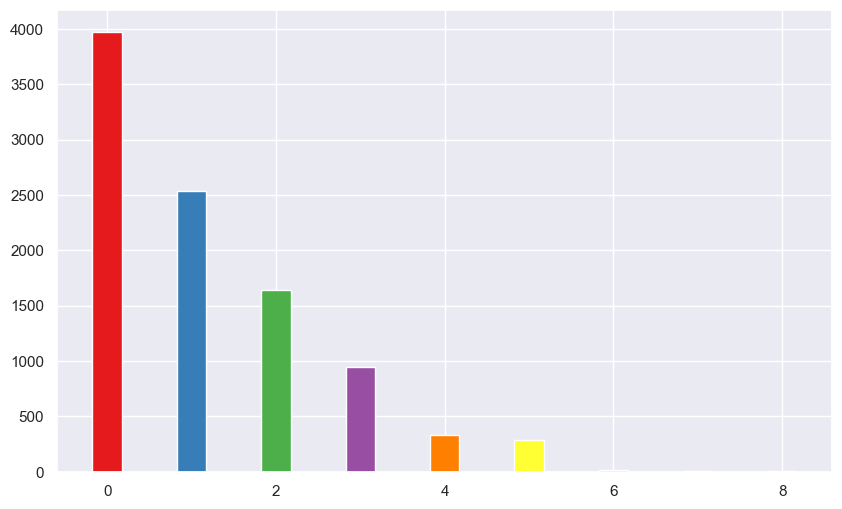

In [ ]:

# TYPE DE REPRESENTATIONA REVOIR /!\ pas tres visuelle

# Comptage pour 'Type_énergie_principale_chauffage'
comptage_type_chauffage = bd_dpe['Type_énergie_principale_chauffage'].value_counts()
colors_ECS = sns.color_palette('Set2')[0:len(comptage_type_ECS)]

# Comptage pour 'type_principale_energie_ECS'
comptage_type_ECS = bd_dpe['Type_énergie_principale_ECS'].value_counts()
colors_chauffage = sns.color_palette('Set1')[0:len(comptage_type_chauffage)]

# Création du graphique en barres superposées
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(comptage_type_chauffage))

# Barres pour 'Type_énergie_principale_chauffage'
plt.bar(index, comptage_type_chauffage, bar_width, color=colors_chauffage, label='Chauffage')

# Barres pour 'type_principale_energie_ECS'
plt.bar(index, comptage_type_ECS, bar_width, color=colors_ECS, label='ECS', alpha=0.7)

# Ajout des labels, titres, et légende
plt.xlabel('Types d\'énergies')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des types d\'énergies pour chauffage et ECS des logements')
plt.xticks(index, comptage_type_chauffage.index)
plt.legend()

# Affichage du graphique
plt.show()

In [ ]:
eda.create_unique(df)

AttributeError: module 'eda' has no attribute 'create_unique'

Analyse de corrélations (via des graphes et probablement une carte)

In [ ]:
# Répartition des données entre données d’entrainement et celles de validation
x=df.iloc[:,[5,6,7,12,13,14,15,16,17,19,20]]
y=df["Etiquette_DPE"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


In [ ]:
#instanciation
model_DT = DecisionTreeClassifier()
#training
model_DT.fit(X_train, y_train)
#Prédiction
prediction = model_DT.predict(X_test)
# Evaluation
print(model_DT.score(X_train, y_train))
print(model_DT.score(X_test, y_test))

scores = cross_val_score(model_DT, x, y, cv=5)
print(scores)

# MAUVAISE PERFORMANCE (OVERFITTING)


0.990755535265921
0.4948665297741273
[0.50256674 0.48741654 0.49357987 0.46533128 0.47817155]


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Vous pouvez ajuster les hyperparamètres selon vos besoins

# Entraînez le classificateur sur l'ensemble d'entraînement
clf.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluez les performances du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# A REVOIR, JE COMPRENDS PAS TROP CES GRANDEURS

Accuracy: 0.5523613963039015
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         6
           B       0.70      0.50      0.58        32
           C       0.73      0.73      0.73       332
           D       0.50      0.60      0.54       284
           E       0.43      0.41      0.42       189
           F       0.30      0.25      0.27        72
           G       0.39      0.22      0.28        59

    accuracy                           0.55       974
   macro avg       0.43      0.39      0.40       974
weighted avg       0.55      0.55      0.55       974

Confusion Matrix:
[[  0   2   3   1   0   0   0]
 [  0  16  11   5   0   0   0]
 [  1   3 243  67  17   1   0]
 [  0   1  61 171  38  11   2]
 [  0   1   9  68  77  22  12]
 [  0   0   2  20  26  18   6]
 [  0   0   3  12  23   8  13]]
